In [119]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import numpy as np

In [120]:
df = pd.read_csv('DataSet9_1.csv', sep = ',', encoding='unicode_escape')
df = df.astype(str)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [121]:
# Преобразование данных в формат, подходящий для алгоритма Apriori
transactions = df.groupby('InvoiceNo')['Description'].apply(list).reset_index(name='Items')['Items'].tolist()

results = list(apriori(transactions, min_support=0.01, min_confidence=0.2, min_lift=1.0))

min_support (Минимальная поддержка):
Это минимальная доля транзакций, в которых должен встречаться набор товаров, чтобы считаться значимым.
Влияние: Чем выше значение min_support, тем меньше будет количество правил и наборов, так как алгоритм будет считать только более часто встречающиеся элементы значимыми.

min_confidence (Минимальная уверенность):
Это минимальный уровень уверенности для ассоциативных правил. Уверенность измеряет, насколько часто правило оказывается верным.
Влияние: Более высокие значения min_confidence приведут к извлечению только более уверенных правил, что может уменьшить количество правил, но сделает их более значимыми.

min_lift (Минимальное значение усиления):
Усиление (lift) измеряет, насколько вероятность появления одного элемента связана с появлением другого. Минимальное значение усиления фильтрует правила, у которых усиление ниже заданного порога.
Влияние: Более высокие значения min_lift фильтруют правила, связанные с меньшими изменениями в вероятности.

In [122]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Items", "Support", "Confidence", "Lift"]

for result in results:
    items = result.items
    support = result.support
    confidence = result.ordered_statistics[0].confidence
    lift = result.ordered_statistics[0].lift

    table.add_row([str(items), f"{support:.4f}", f"{confidence:.4f}", f"{lift:.4f}"])

print(table)

+--------------------------------------------------------------------------------------------------------------------------------------------------+---------+------------+---------+
|                                                                      Items                                                                       | Support | Confidence |   Lift  |
+--------------------------------------------------------------------------------------------------------------------------------------------------+---------+------------+---------+
|                                frozenset({'60 CAKE CASES VINTAGE CHRISTMAS', "PAPER CHAIN KIT 50'S CHRISTMAS "})                                 |  0.0105 |   0.4389   |  9.7160 |
|                              frozenset({'60 CAKE CASES VINTAGE CHRISTMAS', 'SET OF 20 VINTAGE CHRISTMAS NAPKINS'})                               |  0.0105 |   0.4389   | 18.4241 |
|                                   frozenset({'72 SWEETHEART FAIRY CAKE CASES', '60 TEATI

Support: 0.0091 (0.91% транзакций содержат этот набор товаров)

Confidence: 0.2456 (24.56% транзакций с '6 RIBBONS RUSTIC CHARM' также содержат 'JAM MAKING SET PRINTED')

Lift: 5.4178 (5.42 раза чаще, чем если бы товары были независимыми)

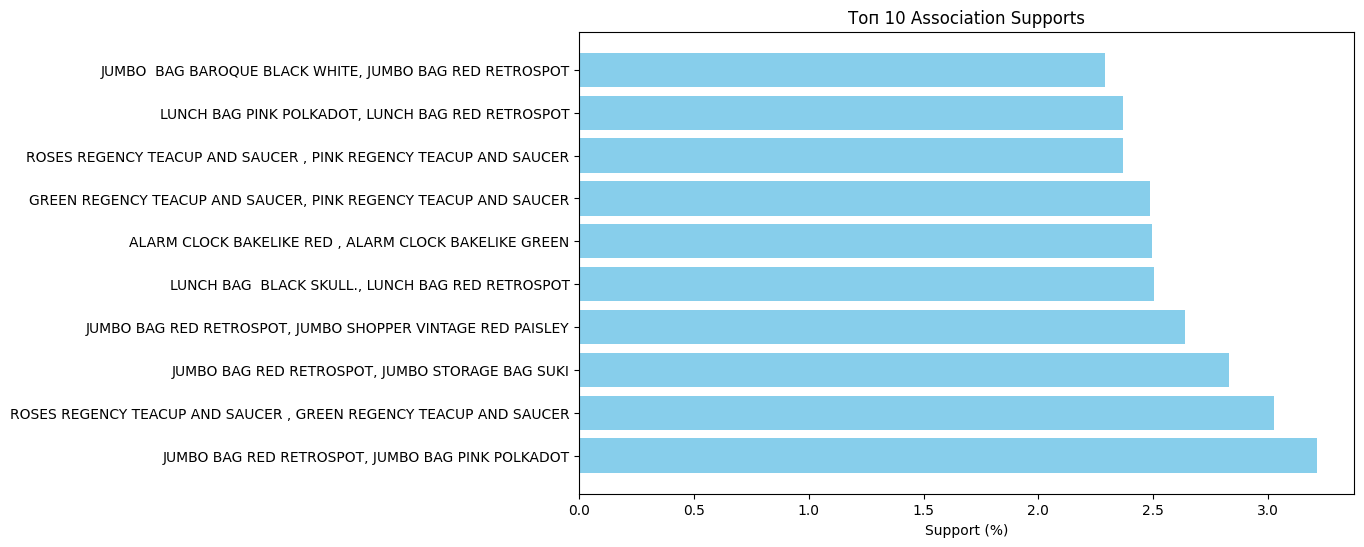

In [132]:
import matplotlib.pyplot as plt

# Получение данных о поддержке
support_data = [(frozenset(result.items), result.support) for result in results]

# Сортировка данных по убыванию поддержки
support_data.sort(key=lambda x: x[1], reverse=True)

# Извлечение топ-N элементов
top_support_data = support_data[:10]

# Разделение данных
items, support = zip(*top_support_data)

# Преобразование frozenset в строки
item_strings = [', '.join(map(str, item)) for item in items]

# Преобразование поддержки в процентный формат
support_percent = [s * 100 for s in support]

# Создание графика
plt.figure(figsize=(10, 6))
plt.barh(item_strings, support_percent, color='skyblue')
plt.xlabel('Support (%)')
plt.title('Топ 10 Association Supports')
plt.show()


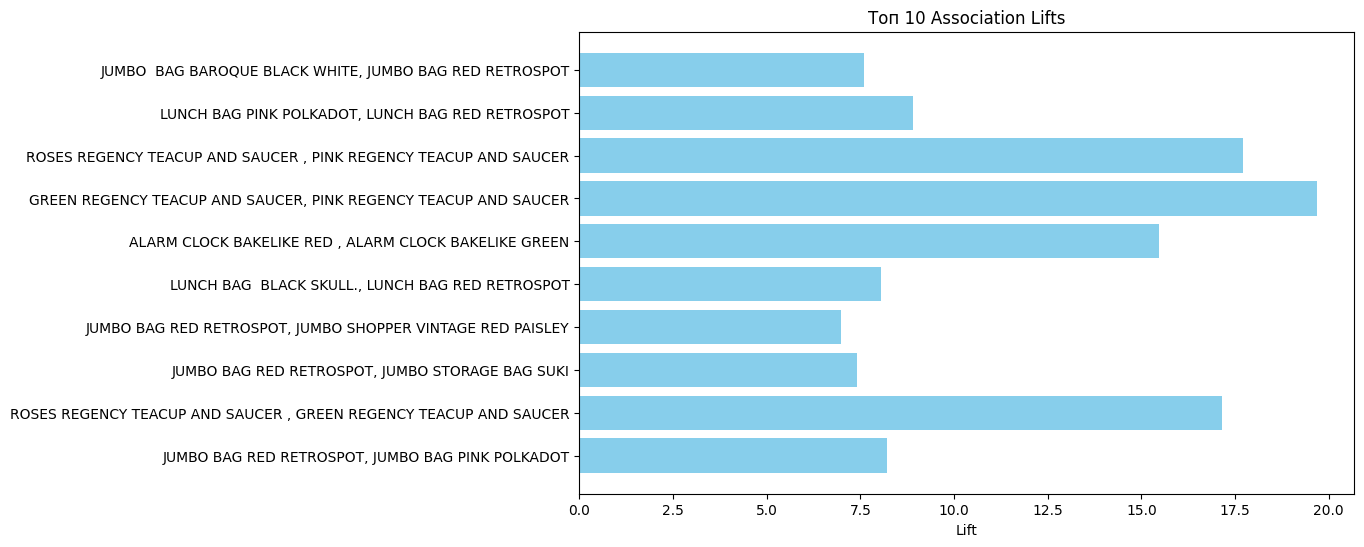

In [143]:
import matplotlib.pyplot as plt

# Получение данных о поддержке, уверенности и усилении
association_data = [(result.items, result.support, result.ordered_statistics[0].confidence, result.ordered_statistics[0].lift) for result in results]

association_data.sort(key=lambda x: x[1], reverse=True)
top_lift_data = association_data[:10]

# Разделение данных
items, support, confidence, lift = zip(*top_lift_data)

# Преобразование frozenset в строки
item_strings = [', '.join(map(str, item)) for item in items]

# Создание графика
plt.figure(figsize=(10, 6))
plt.barh(item_strings, lift, color='skyblue')
plt.xlabel('Lift')
plt.title('Топ 10 Association Lifts')
plt.show()
